# Threshold idea from

https://www.kaggle.com/code/cdeotte/rapids-svr-starter-cv-0-830-lb-0-804

## Models and Scores
### Individual Models
1. **MyDeberta-v3-base OOF**
   - **OOF Score:** 0.825
2. **ChrisDeberta-v2-small**
   - **OOF Score:** 0.823

### Ensembles
3. **CatBoost + LightGBM + XGBoost with DeBERTa OOF**
   - **Weights:** (0.3, 0.2, 0.5)
   - **OOF Score:** 0.839
4. **CatBoost + LightGBM + XGBoost without DeBERTa OOF (500 Features)**
   - **Weights:** (0.25, 0.25, 0.5)
   - **OOF Score:** 0.829
*Ensemble of 1 and 2 with weight 0.7 and 0.3 gives the oof cv of 0.39*

5. **Ensemble of MyDeberta-v3-base and ChrisDeberta-v2-small**
   - **Weights:** (0.5, 0.5)
   - **OOF Score:** 0.83

### Final Ensemble Calculation
Final ensemble = 0.8 * (0.7 * 3 + 0.3 * 4) + 0.2 * 5


In [1]:
def text_prep(x):
    return x
import aes2_preproces_cache_vectorize
TUNE = False

CUDA_AVAILABLE = True


2024-06-21 06:50:40.442785: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 06:50:40.442910: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 06:50:40.585078: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import pandas as pd
oof_chris = pd.read_csv("/kaggle/input/oof-debertas/valid_df_v1_chris.csv")
oof_my = pd.read_csv("/kaggle/input/oof-debertas/valid_df_v0.csv")

In [3]:
import gc

gc.collect()

656

In [4]:
aes2_preproces_cache_vectorize.a

2.998

In [5]:
import pickle

with open("/kaggle/usr/lib/aes2-added-fb-prize-as-features-preprocessing/train_feats.pickle", "rb") as f:
    train_feats = pickle.load(f)
with open("/kaggle/usr/lib/aes2-added-fb-prize-as-features-preprocessing/X.pickle", "rb") as f:
    X = pickle.load(f)
with open("/kaggle/usr/lib/aes2-added-fb-prize-as-features-preprocessing/y.pickle", "rb") as f:
    y = pickle.load(f)
with open("/kaggle/usr/lib/aes2-added-fb-prize-as-features-preprocessing/y_split.pickle", "rb") as f:
    y_split = pickle.load(f)
with open(
    "/kaggle/input/aes2-eval-added-fb-prize-as-features-8168c5/feature_select.pickle", "rb"
) as f:
    feature_select = pickle.load(f)
    
aes2_preproces_cache_vectorize.feature_select = feature_select

In [6]:
oof_my = oof_my.set_index('essay_id').loc[train_feats['essay_id']].reset_index()
oof_chris = oof_chris.set_index('essay_id').loc[train_feats['essay_id']].reset_index()

In [7]:
oof_my

,essay_id,full_text,score,prompt,label,fold,pred
0,000d118,Many people have car where they live. The thin...,3,Car-free cities,2.0,0.0,2.125000
1,000fe60,I am a scientist at NASA that is discussing th...,3,The Face on Mars,2.0,0.0,2.925781
2,001ab80,People always wish they had the same technolog...,4,Driverless cars,3.0,0.0,4.314453
3,001bdc0,"We all heard about Venus, the planet without a...",4,Exploring Venus,3.0,0.0,3.289062
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,Does the electoral college work?,2.0,0.0,2.510742
...,...,...,...,...,...,...,...
17302,ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2,Exploring Venus,1.0,4.0,2.044922
17303,ffddf1f,Technology has changed a lot of ways that we l...,4,Facial action coding system,3.0,4.0,3.945312
17304,fff016d,If you don't like sitting around all day than ...,2,"""A Cowboy Who Rode the Waves""",1.0,4.0,1.983887
17305,fffb49b,"In ""The Challenge of Exporing Venus,"" the auth...",1,Exploring Venus,0.0,4.0,1.447510


In [8]:
import pandas as pd
from torch.nn.functional import softmax
import torch
import numpy as np
oof = pd.read_csv("/kaggle/input/deberta-oof-no-leaky/submission.csv")
oof_prob = oof[["deberta0","deberta1","deberta2","deberta3","deberta4","deberta5"]].astype(np.float32).values
oof_probility = softmax(torch.tensor(oof_prob),dim=1)
oof_probility = np.array(oof_probility)


In [9]:
train_feats

,essay_id,paragraph_0_cnt,paragraph_50_cnt,paragraph_75_cnt,paragraph_100_cnt,paragraph_125_cnt,paragraph_150_cnt,paragraph_175_cnt,paragraph_200_cnt,paragraph_250_cnt,...,deberta_oof_2,deberta_oof_3,deberta_oof_4,deberta_oof_5,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,000d118,1,1,1,1,1,1,1,1,1,...,0.370559,0.007214,0.000358,0.000270,2.838330,2.648617,3.225708,2.852826,2.682580,2.372594
1,000fe60,5,5,5,5,5,5,5,4,3,...,0.850459,0.019771,0.000243,0.000090,3.301917,3.215416,3.436492,3.428899,3.493132,2.969440
2,001ab80,4,4,4,4,4,4,4,4,4,...,0.029406,0.461900,0.499130,0.006177,4.223053,4.069751,4.395761,4.302904,4.315377,4.023932
3,001bdc0,5,5,5,5,5,4,4,4,4,...,0.546403,0.431593,0.003959,0.000235,3.695875,3.485972,4.000536,3.655286,3.484632,3.629644
4,002ba53,6,4,4,4,4,4,4,4,4,...,0.855064,0.026926,0.000613,0.000375,3.449726,3.228402,3.503447,3.219933,3.524052,3.082691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17302,ffd378d,3,3,3,3,3,2,2,2,2,...,0.015016,0.000987,0.000496,0.000496,2.838110,2.766599,3.016311,2.862665,3.148461,2.370611
17303,ffddf1f,6,6,6,6,6,6,6,6,6,...,0.127668,0.859217,0.008399,0.000277,3.741988,3.597480,4.047345,3.789423,3.869903,3.431877
17304,fff016d,3,3,3,3,3,3,3,3,3,...,0.018690,0.000611,0.000187,0.000201,3.020992,3.200693,3.147815,3.225112,3.434589,3.233156
17305,fffb49b,1,1,1,1,1,1,1,1,1,...,0.004515,0.000549,0.000302,0.000330,3.282401,3.249711,3.621132,3.329562,3.582021,3.451831


In [10]:
train_feats_doosra = train_feats.copy()


In [11]:
for i in range(6):
    column_name = f"deberta_oof_{i}"
    train_feats_doosra[column_name] = oof_probility[:,i]
feature_select2 = feature_select[:500]


In [12]:
import numpy as np

X2 = train_feats_doosra[feature_select2].astype(np.float32).values

# X = train_feats[feature_select + ["max_repeated_word_count"]].astype(np.float32).values
X = train_feats[feature_select].astype(np.float32).values

In [13]:
# Initial please see threshold optimization
thresholds = [1.5, 2.6, 3.5, 4.59, 5.55]

In [14]:
class QWKObjective(object):
    def calc_ders_range(self, approxes, targets, weights):
        labels = np.array(targets) + a
        preds = np.array(approxes) + a
        preds = preds.clip(1, 6)
        f = 1/2 * np.sum((preds - labels)**2)
        g = 1/2 * np.sum((preds - a)**2 + b)
        df = preds - labels
        dg = preds - a
        grad = (df / g - f * dg / g**2) * len(labels)
        hess = (1 / g - (2 * df * dg) / (g**2) + (2 * f * dg**2) / (g**3)) * len(labels)
        return list(zip(grad, hess))

# Custom QWK Metric
class QWKMetric(object):
    def get_final_error(self, error, weight):
        return error

    def is_max_optimal(self):
        return True

    def evaluate(self, approxes, targets, weight):
        approxes = approxes[0]
        targets = np.array(targets) + a
        approxes = np.array(approxes) + a
        approxes = approxes.clip(1, 6).round()
        qwk = cohen_kappa_score(targets, approxes, weights="quadratic")
        return qwk, 0


In [15]:
loadfrom = "/kaggle/input/clx-models/"
import catboost as cb 

fold 1
traininf catboost for fold1


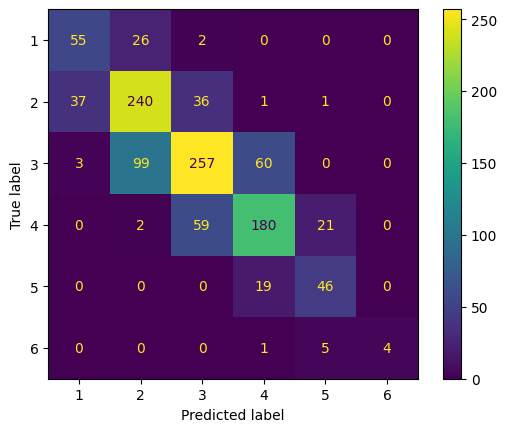

F1 score across fold: 0.6767724522748808
Cohen kappa score across fold: 0.8423024054290535
fold 2
traininf catboost for fold2


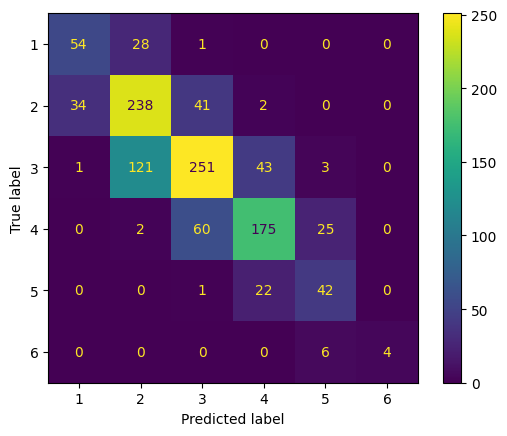

F1 score across fold: 0.6616875634629611
Cohen kappa score across fold: 0.8365464450504275
fold 3
traininf catboost for fold3


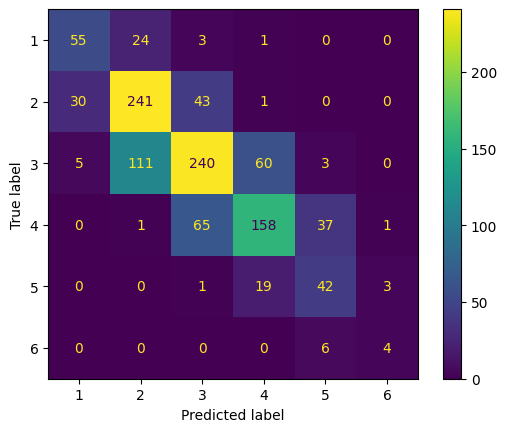

F1 score across fold: 0.6398806967257197
Cohen kappa score across fold: 0.8235694675701459
fold 4
traininf catboost for fold4


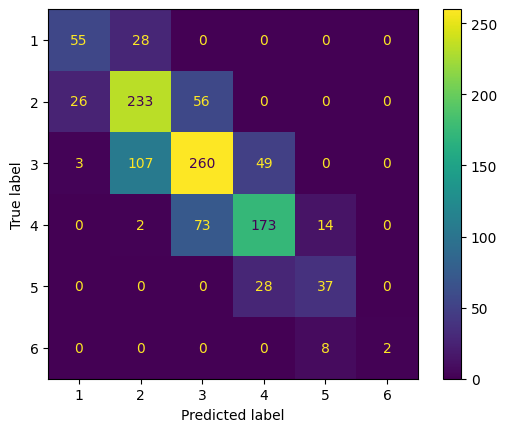

F1 score across fold: 0.6566676241300413
Cohen kappa score across fold: 0.8332130688504152
fold 5
traininf catboost for fold5


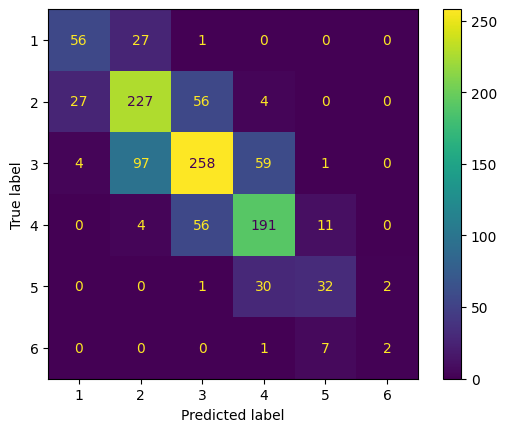

F1 score across fold: 0.6612858149699954
Cohen kappa score across fold: 0.8239437901086827
fold 6
traininf catboost for fold6


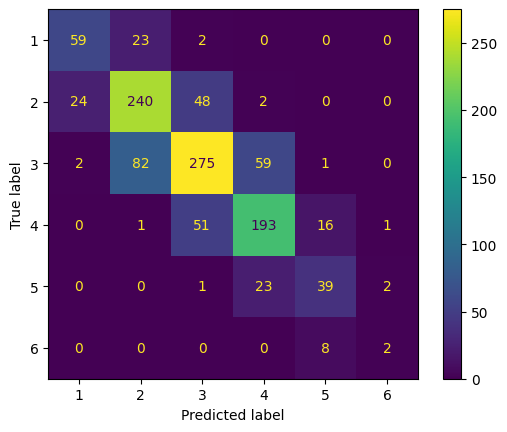

F1 score across fold: 0.6985463682175083
Cohen kappa score across fold: 0.8505574682002726
fold 7
traininf catboost for fold7


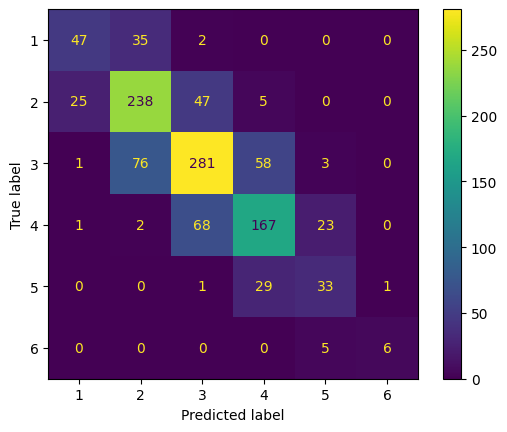

F1 score across fold: 0.6680726822816306
Cohen kappa score across fold: 0.8259734293631439
fold 8
traininf catboost for fold8


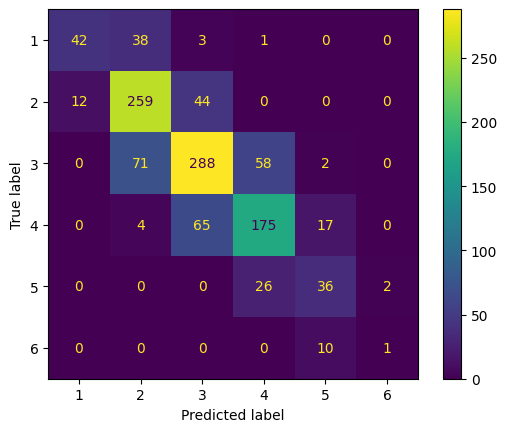

F1 score across fold: 0.6897321679487669
Cohen kappa score across fold: 0.8378900126211701
fold 9
traininf catboost for fold9


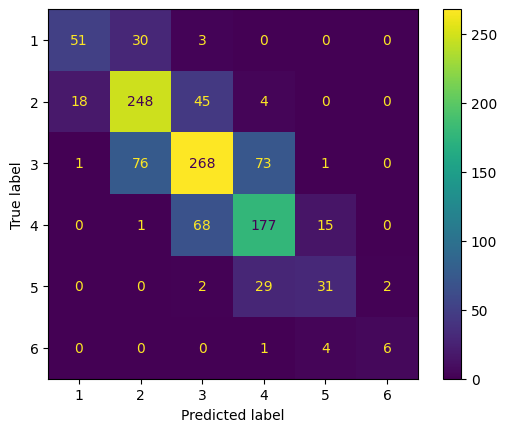

F1 score across fold: 0.6748689084638942
Cohen kappa score across fold: 0.8320433463874596
fold 10
traininf catboost for fold10


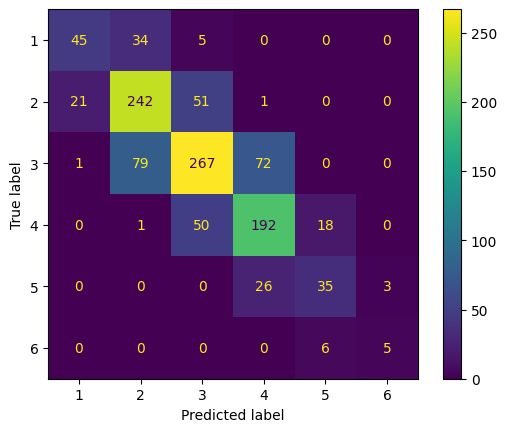

F1 score across fold: 0.6789985883712255
Cohen kappa score across fold: 0.8421883645106621
fold 11
traininf catboost for fold11


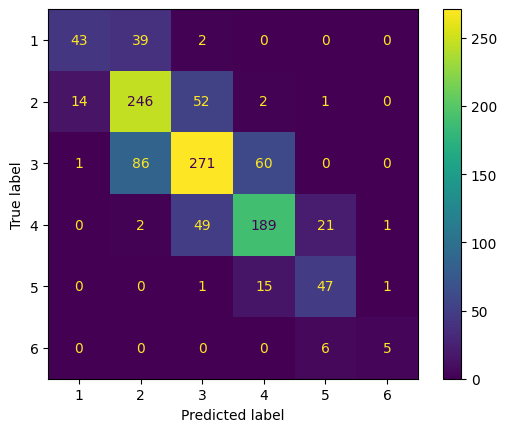

F1 score across fold: 0.6921919978967602
Cohen kappa score across fold: 0.844588187436048
fold 12
traininf catboost for fold12


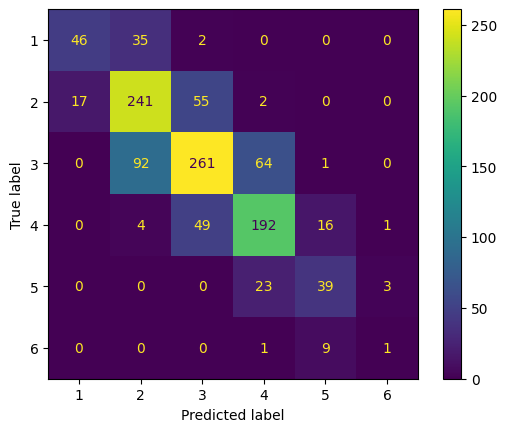

F1 score across fold: 0.6729450615631875
Cohen kappa score across fold: 0.8353632588735193
fold 13
traininf catboost for fold13


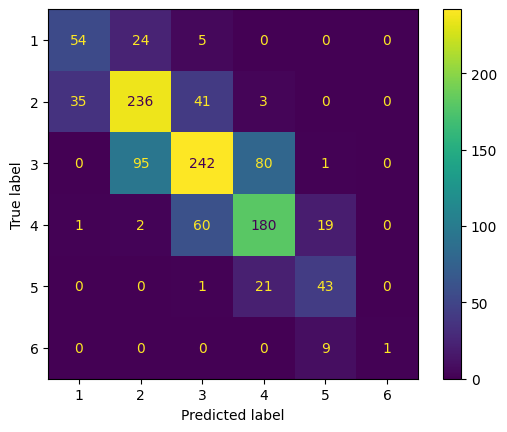

F1 score across fold: 0.6523884802475225
Cohen kappa score across fold: 0.8267974423930404
fold 14
traininf catboost for fold14


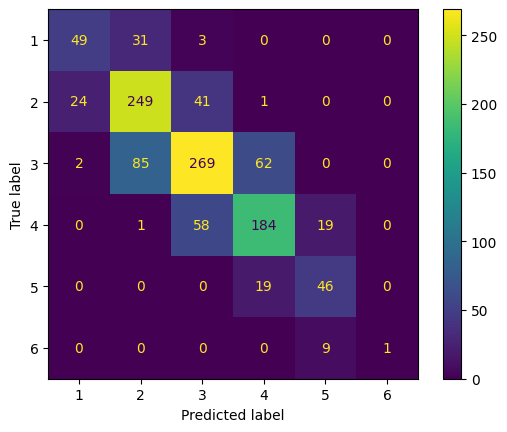

F1 score across fold: 0.6889014239714728
Cohen kappa score across fold: 0.8487449959981941
fold 15
traininf catboost for fold15


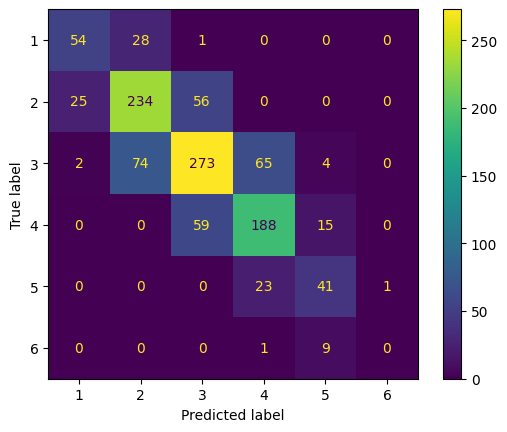

F1 score across fold: 0.6821030068233419
Cohen kappa score across fold: 0.8434980514900463


In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, cohen_kappa_score
from aes2_preproces_cache_vectorize import *

import builtins
original_print = builtins.print
def patch_print(text, *args, **kwargs):
    if not isinstance(text, str):
        return original_print(text, *args, **kwargs)
    if "	" in text:
        n = text.split("	")[0]
        try:
            n = int(n.strip("[]"))
            if n % 100 == 0:
                original_print(text)
            return None
        except:
            pass
    original_print(text, *args, **kwargs)

builtins.print = patch_print

n_splits = 15
models = []
models2 = []
predictions = []
f1_scores = []
kappa_scores = []


def quadratic_weighted_kappa(y_true, y_pred):
    if isinstance(y_pred, xgb.QuantileDMatrix):
        # XGB
        y_true, y_pred = y_pred, y_true

        y_true = (y_true.get_label() + a).round()
        y_pred = (y_pred + a).clip(1, 6).round()
        qwk = cohen_kappa_score(y_true, y_pred, weights="quadratic")
        return 'QWK', qwk

    else:
        # For lgb
        y_true = y_true + a
        y_pred = (y_pred + a).clip(1, 6).round()
        qwk = cohen_kappa_score(y_true, y_pred, weights="quadratic")
        return 'QWK', qwk, True
    
def qwk_obj(y_true, y_pred):
    labels = y_true + a
    preds = y_pred + a
    preds = preds.clip(1, 6)
    f = 1/2*np.sum((preds-labels)**2)
    g = 1/2*np.sum((preds-a)**2+b)
    df = preds - labels
    dg = preds - a
    grad = (df/g - f*dg/g**2)*len(labels)
    hess = np.ones(len(labels))
    return grad, hess

class Predictor:
    def __init__(self, models: list, weights: list):
        self.models = models
        self.weights = weights
#         self.xgb_boost_best_iter = models[1].
    def predict(self, X):
        n_models = len(self.models)
        predicted = 0
        for i, model in enumerate(self.models):
            predicted += self.weights[i]*model.predict(X)
        return predicted

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
xgboost_best_iters = []
light_best_iters = []
cat_best_iters = []


_test = pd.read_csv("/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv")
ENABLE_DONT_WASTE_YOUR_RUN_TIME = len(_test) < 10
ENABLE_DONT_WASTE_YOUR_RUN_TIME = False
oof = np.zeros(len(train), dtype='float32')
oof2 = np.zeros(len(train), dtype='float32')

for i, (train_index, test_index) in enumerate(skf.split(X, y_split), 1):
    # Split the data into training and testing sets for this fold
    print('fold',i)
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    X_train_fold2, X_test_fold2 = X2[train_index], X2[test_index]
    y_train_fold, y_test_fold, y_test_fold_int = y[train_index], y[test_index], y_split[test_index]
    
    print(f"traininf catboost for fold{i}")
    cat_reg = cb.CatBoostRegressor(
        loss_function=QWKObjective(),
        eval_metric=QWKMetric(),
        learning_rate=0.05,
        depth=5,
        l2_leaf_reg=0.1,
        iterations=700,
        random_seed=412,
        verbose=25,
        early_stopping_rounds=75
    )
    if loadfrom:
        cat_reg = joblib.load(loadfrom+f'catboost_fold_{i}.joblib')
        cat_reg2 = joblib.load("/kaggle/input/no-leakssmodels/"+f'catboost_fold_{i}.joblib')
    else:
        cat_reg.fit(X_train_fold,
                    y_train_fold,
                    eval_set = [(X_train_fold, y_train_fold), (X_test_fold, y_test_fold)]
                   )
        cat_best_iters.append(cat_reg.get_best_iteration())
        joblib.dump(cat_reg, f'catboost_fold_{i}.joblib')
    
    
    callbacks = [log_evaluation(period=25), early_stopping(stopping_rounds=75, first_metric_only=True)]
    light = lgb.LGBMRegressor(
            objective = qwk_obj,
            metrics = 'None',
            learning_rate = 0.05,
            max_depth = 8,
            num_leaves = 10,
            colsample_bytree=0.3,
            reg_alpha = 0.7,
            reg_lambda = 0.1,
            n_estimators=700,
            random_state=42,
            extra_trees=True,
            class_weight='balanced',
            device='gpu' if CUDA_AVAILABLE else 'cpu',
            verbosity = - 1
        )

    # Fit the model on the training data for this fold  
    
    if loadfrom:
        light = joblib.load(loadfrom+f'light_fold_{i}.joblib')
        light2 = joblib.load("/kaggle/input/no-leakssmodels/"+f'light_fold_{i}.joblib')
    else:
        light.fit(
            X_train_fold,
            y_train_fold,
            eval_names=['train', 'valid'],
            eval_set=[(X_train_fold, y_train_fold), (X_test_fold, y_test_fold)],
            eval_metric=quadratic_weighted_kappa,
            callbacks=callbacks
        )
        light_best_iters.append(light.best_iteration_)
        print(f"Light best iter: {light.best_iteration_}")
        joblib.dump(light, f'light_fold_{i}.joblib')

    xgb_regressor = xgb.XGBRegressor(
        objective = qwk_obj,
        verbosity = 0,
        metrics = 'None',
        learning_rate = 0.1,
        max_depth = 8,
        num_leaves = 10,
        colsample_bytree=0.5,
        reg_alpha = 0.1,
        reg_lambda = 1.6, # validation_1-QWK:0.84010
#         reg_lambda = 0.8, validation_1-QWK:0.83917
        
        n_estimators=1024,
        random_state=42,
#         gamma=0.05,
        extra_trees=True,
        scale_pos_weight=100,
        class_weight='balanced',
        tree_method="hist",
        device="gpu" if CUDA_AVAILABLE else "cpu"
    #             device='gpu',
    #             verbosity = 1
    )
    
    xgb_callbacks = [
        xgb.callback.EvaluationMonitor(period=25),
        xgb.callback.EarlyStopping(75, metric_name="QWK", maximize=True, save_best=True, data_name="validation_1")
    ]
    if loadfrom:
        xgb_regressor = joblib.load(loadfrom+f'xgb_fold_{i}.joblib')
        xgb_regressor2 = joblib.load("/kaggle/input/no-leakssmodels/"+f'xgb_fold_{i}.joblib')
    else:
        xgb_regressor.fit(
            X_train_fold,
            y_train_fold,
            eval_set=[(X_train_fold, y_train_fold), (X_test_fold, y_test_fold)],
            eval_metric=quadratic_weighted_kappa,
            callbacks=xgb_callbacks
        )
        print(f"XGBoost best iter: {xgb_regressor.get_booster().best_iteration}")
        joblib.dump(xgb_regressor, f'xgb_fold_{i}.joblib')
        xgboost_best_iters.append(xgb_regressor.get_booster().best_iteration)

    
    predictor = Predictor([light, xgb_regressor,cat_reg], [0.5,0.2,0.3])
    predictor2 = Predictor([light2, xgb_regressor2,cat_reg2], [0.5,0.25,0.25])
    models.append(predictor)
    models2.append(predictor2)
    # Make predictions on the test data for this fold
    predictions_fold = predictor.predict(X_test_fold)
    predictions_fold = predictions_fold + a
    oof[test_index] = predictions_fold.clip(1, 6)
    
    predictions_fold = pd.cut(
        predictions_fold, [-np.inf] + thresholds + [np.inf], 
                    labels=[1,2,3,4,5,6]
    ).astype('int32')
    predictions_fold = predictions_fold.clip(1, 6).round()
    predictions.append(predictions_fold)
    # Calculate and store the F1 score for this fold
    f1_fold = f1_score(y_test_fold_int, predictions_fold, average='weighted')
    f1_scores.append(f1_fold)

    # Calculate and store the Cohen's kappa score for this fold
    kappa_fold = cohen_kappa_score(y_test_fold_int, predictions_fold, weights='quadratic')
    kappa_scores.append(kappa_fold)
#         predictor.booster_.save_model(f'fold_{i}.txt')
    cm = confusion_matrix(y_test_fold_int, predictions_fold, labels=[x for x in range(1,7)])

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=[x for x in range(1,7)]
    )
    predictions_fold2 = predictor2.predict(X_test_fold2)
    predictions_fold2 = predictions_fold2 + a
    oof2[test_index] = predictions_fold2.clip(1, 6)
    
    disp.plot()
    plt.show()
    print(f'F1 score across fold: {f1_fold}')
    print(f'Cohen kappa score across fold: {kappa_fold}')

    gc.collect()
    if ENABLE_DONT_WASTE_YOUR_RUN_TIME:
        break


In [17]:
models2

# Threshold optimization

In [18]:
oof[:100]

array([2.0299537, 2.8997653, 4.352023 , 3.5295713, 2.7437851, 3.8558934,
       1.954664 , 2.975091 , 2.5863366, 2.6163313, 2.239556 , 1.697403 ,
       4.482932 , 2.9703803, 2.8904498, 2.0518346, 2.7527912, 4.15618  ,
       3.8266726, 2.5307734, 1.151386 , 1.4262697, 2.2255843, 2.8495233,
       3.6314385, 1.       , 4.1645665, 1.5992994, 3.0958362, 2.4799273,
       4.0169325, 2.6636279, 2.076505 , 3.6768959, 2.3901453, 3.267366 ,
       3.599666 , 1.8164357, 4.7690063, 3.1670864, 3.0467749, 1.7242982,
       2.6504927, 3.0005069, 2.8904362, 3.4795709, 1.7743558, 3.061659 ,
       4.728015 , 2.170791 , 2.4945621, 3.6633909, 3.5864048, 1.8560882,
       3.1187353, 1.365947 , 2.1335344, 5.053334 , 1.8702303, 2.9860482,
       3.1838477, 1.6595914, 2.9098964, 3.825124 , 1.266766 , 1.3279915,
       4.445613 , 2.9615765, 1.1263765, 2.7346988, 4.438899 , 3.8840644,
       2.8550751, 3.4357035, 3.636881 , 1.64955  , 3.9022977, 3.2811878,
       2.244152 , 4.3096333, 1.9982805, 3.4059103, 

In [19]:
oof2[:100]

array([1.4034932, 2.9643202, 4.4718246, 3.800613 , 3.050837 , 3.8864112,
       2.0962024, 2.9405982, 2.8012638, 2.4626932, 1.8244574, 2.031095 ,
       4.3804474, 2.7793343, 2.8135002, 2.5004392, 2.4570048, 4.1534276,
       3.8005655, 2.6367242, 1.2588955, 1.3984033, 2.558757 , 2.6007752,
       3.6924956, 1.3514521, 4.3776793, 1.6452476, 3.1427746, 2.2468696,
       3.9969134, 2.7018664, 2.0062897, 3.790097 , 2.2644553, 2.981958 ,
       3.3842568, 1.8044717, 5.11596  , 3.2048354, 2.77151  , 2.3967006,
       2.2020042, 3.036914 , 2.8440773, 3.0234618, 1.6937201, 2.8122587,
       4.777087 , 1.9396275, 2.5715873, 3.525347 , 3.3713233, 2.125091 ,
       2.8792725, 1.4538509, 1.8902613, 5.1779013, 1.6180019, 2.838628 ,
       3.1100729, 1.9238896, 3.1118112, 3.5108335, 1.5687189, 1.3427203,
       4.128877 , 2.6799254, 1.5702168, 2.381103 , 4.616455 , 4.0244393,
       2.8332047, 3.2823372, 3.7530727, 1.438091 , 3.7409685, 3.6677065,
       2.2288802, 4.3143106, 1.7978798, 3.368187 , 

In [20]:
n = 0.7
finaloof = n*oof+(1-n)*oof2
print(cohen_kappa_score(y_split, finaloof.clip(1,6).round(), weights='quadratic'))
print(cohen_kappa_score(y_split, oof.clip(1,6).round(), weights='quadratic'))
print(cohen_kappa_score(y_split, oof2.clip(1,6).round(), weights='quadratic'))

0.8393888276314093
0.8391578936105867
0.8199974764392366


In [21]:
from tqdm import tqdm

In [22]:
def find_thresholds(true, pred, steps=50):

    # SAVE TRIALS FOR PLOTTING
    xs = [[],[],[],[],[]]
    ys = [[],[],[],[],[]]

    # COMPUTE BASELINE METRIC
    threshold = [1.5, 2.5, 3.5, 4.5, 5.5]
    pred2 = pd.cut(pred, [-np.inf] + threshold + [np.inf], 
                    labels=[1,2,3,4,5,6]).astype('int32')
    best = cohen_kappa_score(true, pred2, weights="quadratic")

    # FIND FIVE OPTIMAL THRESHOLDS
    for k in tqdm(range(5)):
        for sign in [1,-1]:
            v = threshold[k]
            threshold2 = threshold.copy()
            stop = 0
            while stop<steps:

                # TRY NEW THRESHOLD
                v += sign * 0.001
                threshold2[k] = v
                pred2 = pd.cut(pred, [-np.inf] + threshold2 + [np.inf], 
                                labels=[1,2,3,4,5,6]).astype('int32')
                metric = cohen_kappa_score(true, pred2, weights="quadratic")

                # SAVE TRIALS FOR PLOTTING
                xs[k].append(v)
                ys[k].append(metric)

                # EARLY STOPPING
                if metric<=best:
                    stop += 1
                else:
                    stop = 0
                    best = metric
                    threshold = threshold2.copy()

    # COMPUTE FINAL METRIC
    pred2 = pd.cut(pred, [-np.inf] + threshold + [np.inf], 
                    labels=[1,2,3,4,5,6]).astype('int32')
    best = cohen_kappa_score(true, pred2, weights="quadratic")   

    # RETURN RESULTS
    threshold = [np.round(t,3) for t in threshold]
    return best, threshold, xs, ys


In [23]:
best, thresholds, xs, ys = find_thresholds(y_split, finaloof, steps=500)
print('Best thresholds are:', thresholds )
print('=> achieve Overall CV QWK score =', best )


100%|██████████| 5/5 [01:48<00:00, 21.63s/it]

Best thresholds are: [1.617, 2.521, 3.463, 4.424, 5.206]
=> achieve Overall CV QWK score = 0.8435015752511625


# Tuning Hyper parameters

In [24]:
if TUNE:
    import optuna

    def objective(trial):
        xgb_regressor = xgb.XGBRegressor(
            objective = qwk_obj,
            verbosity = 0,
            metrics = 'None',
            learning_rate = 0.1,
            max_depth = 8,
            num_leaves = 10,
            colsample_bytree=0.5,
            reg_alpha = 0.1,
            reg_lambda = trial.suggest_float('reg_lambda', 0, 2, step=0.05),
    #         reg_lambda = 1.0, # validation_1-QWK:0.84010
    #         reg_lambda = 0.8, validation_1-QWK:0.83917

            n_estimators=1024,
            random_state=42,
    #         gamma=0.05,
            extra_trees=True,
            scale_pos_weight=100,
            class_weight='balanced',
            tree_method="hist",
            device="gpu" if CUDA_AVAILABLE else "cpu"
        #             device='gpu',
        #             verbosity = 1
        )

        xgb_callbacks = [
            xgb.callback.EvaluationMonitor(period=25),
            xgb.callback.EarlyStopping(175, metric_name="QWK", maximize=True, save_best=True, data_name="validation_1")
        ]
        predictor = xgb_regressor.fit(
            X_train_fold,
            y_train_fold,
            eval_set=[(X_train_fold, y_train_fold), (X_test_fold, y_test_fold)],
            eval_metric=quadratic_weighted_kappa,
            callbacks=xgb_callbacks
        )

        predictions_fold = predictor.predict(X_test_fold)
        predictions_fold = predictions_fold + a
        predictions_fold = predictions_fold.clip(1, 6).round()
        predictions.append(predictions_fold)
        # Calculate and store the F1 score for this fold


        # Calculate and store the Cohen's kappa score for this fold
        kappa_fold = cohen_kappa_score(y_test_fold_int, predictions_fold, weights='quadratic')
        return kappa_fold

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)



    print(f"{study.best_params=}")

    with open("optuna_study.pickle", "wb") as f:
        pickle.dump(study, f)

In [25]:
mean_f1_score = np.mean(f1_scores)
mean_kappa_score = np.mean(kappa_scores)
# Print the mean scores
print(f'Mean F1 score across {n_splits} folds: {mean_f1_score}')
print(f'Mean Cohen kappa score across {n_splits} folds: {mean_kappa_score}')
if not loadfrom:
    print(f"XGBoost mean best iters: {sum(xgboost_best_iters)/len(xgboost_best_iters)}")
    print(f"LightBoost mean best iters: {sum(light_best_iters)/len(light_best_iters)}")

Mean F1 score across 15 folds: 0.6730028558232605
Mean Cohen kappa score across 15 folds: 0.8364813156188188


In [26]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,1"

# True USES REGRESSION, False USES CLASSIFICATION
USE_REGRESSION = True

# VERSION NUMBER FOR NAMING OF SAVED MODELS
VER=1

# IF "LOAD_FROM" IS None, THEN WE TRAIN NEW MODELS
LOAD_FROM = "/kaggle/input/deb-models/deb models/"

# WHEN TRAINING NEW MODELS SET COMPUTE_CV = True
# WHEN LOADING MODELS, WE CAN CHOOSE True or False
COMPUTE_CV = True


In [27]:
import warnings
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig
from transformers import TrainingArguments, Trainer
from transformers import DataCollatorWithPadding
from datasets import Dataset
from sklearn.model_selection import GroupKFold,StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
from tokenizers import AddedToken
warnings.simplefilter('ignore')


In [28]:
class PATHS:
    train_path = '/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv'
    test_path = '/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv'
    sub_path = '/kaggle/input/learning-agency-lab-automated-essay-scoring-2/sample_submission.csv'
    model_path = "/kaggle/input/huggingfacedebertav3variants/deberta-v3-base"


In [29]:
class CFG:
    n_splits = 5
    seed = 42
    max_length = 1024
    lr = 1e-5
    train_batch_size = 4
    eval_batch_size = 8
    train_epochs = 4
    weight_decay = 0.01
    warmup_ratio = 0.0
    num_labels = 6


In [30]:
class Tokenize(object):
    def __init__(self, train, valid, tokenizer):
        self.tokenizer = tokenizer
        self.train = train
        self.valid = valid
        
    def get_dataset(self, df):
        ds = Dataset.from_dict({
                'essay_id': [e for e in df['essay_id']],
                'full_text': [ft for ft in df['full_text']],
                'label': [s for s in df['label']],
            })
        return ds
        
    def tokenize_function(self, example):
        tokenized_inputs = self.tokenizer(
            example['full_text'], truncation=True, max_length=CFG.max_length
        )
        return tokenized_inputs
    
    def __call__(self):
        train_ds = self.get_dataset(self.train)
        valid_ds = self.get_dataset(self.valid)
        
        tokenized_train = train_ds.map(
            self.tokenize_function, batched=True
        )
        tokenized_valid = valid_ds.map(
            self.tokenize_function, batched=True
        )
        
        return tokenized_train, tokenized_valid, self.tokenizer


In [31]:
training_args = TrainingArguments(
    output_dir=f'output_v{VER}',
    fp16=True,
    learning_rate=CFG.lr,
    per_device_train_batch_size=CFG.train_batch_size,
    per_device_eval_batch_size=CFG.eval_batch_size,
    num_train_epochs=CFG.train_epochs,
    weight_decay=CFG.weight_decay,
    evaluation_strategy='epoch',
    metric_for_best_model='qwk',
    save_strategy='epoch',
    save_total_limit=1,
    load_best_model_at_end=True,
    report_to='none',
    warmup_ratio=CFG.warmup_ratio,
    lr_scheduler_type='linear', # "cosine" or "linear" or "constant"
    optim='adamw_torch',
    logging_first_step=True,
)


In [32]:
test = pd.read_csv(PATHS.test_path)
print('Test shape:', test.shape )
test.head()


Test shape: (3, 2)


,essay_id,full_text
0,000d118,Many people have car where they live. The thin...
1,000fe60,I am a scientist at NASA that is discussing th...
2,001ab80,People always wish they had the same technolog...


In [33]:
all_pred = []
all_pred_chris = []

test['label'] = 0.0

for fold in range(5):
    
    # LOAD TOKENIZER
    if LOAD_FROM:
        tokenizer = AutoTokenizer.from_pretrained(LOAD_FROM + f'deberta-v3-base_AES2_fold_{fold}_v{VER}')
        tokenizer_chris = AutoTokenizer.from_pretrained("/kaggle/input/deberta-v3-small-finetuned-v1/" + f'deberta-v3-small_AES2_fold_{fold}_v{VER}')
    else:
        tokenizer = AutoTokenizer.from_pretrained(f'deberta-v3-base_AES2_fold_{fold}_v{VER}')
    tokenize = Tokenize(test, test, tokenizer)
    tokenized_test, _, _ = tokenize()

    # LOAD MODEL
    if LOAD_FROM:
        model = AutoModelForSequenceClassification.from_pretrained(LOAD_FROM + f'deberta-v3-base_AES2_fold_{fold}_v{VER}')
        model_chris = AutoModelForSequenceClassification.from_pretrained("/kaggle/input/deberta-v3-small-finetuned-v1/" + f'deberta-v3-small_AES2_fold_{fold}_v{VER}')
    else:
        model = AutoModelForSequenceClassification.from_pretrained(f'deberta-v3-base_AES2_fold_{fold}_v{VER}')
    
    # INFER WITH TRAINER
    data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
    trainer = Trainer( 
        model=model,
        args=training_args,
        train_dataset=tokenized_test,
        data_collator=data_collator,
        tokenizer=tokenizer,
    )
    trainer_chris = Trainer( 
        model=model_chris,
        args=training_args,
        train_dataset=tokenized_test,
        data_collator=data_collator,
        tokenizer=tokenizer_chris,
    )

    # SAVE PREDICTIONS
    predictions = trainer.predict(tokenized_test).predictions
    predictions_chris = trainer_chris.predict(tokenized_test).predictions
    all_pred.append( predictions )
    all_pred_chris.append( predictions_chris )


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Parameter 'function'=<bound method Tokenize.tokenize_function of <__main__.Tokenize object at 0x79ed00408cd0>> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

In [34]:
all_pred

[array([1.1259766, 1.9257812, 3.3144531], dtype=float32),
 array([1.6728516, 1.9091797, 3.1777344], dtype=float32),
 array([1.3271484, 2.0449219, 3.3457031], dtype=float32),
 array([1.6015625, 1.9726562, 3.328125 ], dtype=float32),
 array([1.4609375, 2.1796875, 3.4003906], dtype=float32)]

In [35]:
all_pred_chris

[array([1.3222656, 2.0039062, 3.2089844], dtype=float32),
 array([1.4023438, 2.0292969, 3.3671875], dtype=float32),
 array([0.9121094, 1.9199219, 3.6796875], dtype=float32),
 array([1.1582031, 2.0410156, 3.3867188], dtype=float32),
 array([0.9560547, 1.9511719, 3.3984375], dtype=float32)]

In [36]:
deberta_pred_my = np.mean(all_pred,axis=0)
deberta_pred_chris = np.mean(all_pred_chris,axis=0)

In [37]:
deberta_pred_my = deberta_pred_my+1
deberta_pred_chris = deberta_pred_chris+1

In [38]:
deberta_pred_my

array([2.4376953, 3.0064454, 4.313281 ], dtype=float32)

In [39]:
deberta_pred_chris

array([2.1501954, 2.9890625, 4.408203 ], dtype=float32)

In [40]:
oof_chris

,essay_id,full_text,score,label,fold,pred
0,000d118,Many people have car where they live. The thin...,3,2.0,3.0,2.157670
1,000fe60,I am a scientist at NASA that is discussing th...,3,2.0,4.0,2.949010
2,001ab80,People always wish they had the same technolog...,4,3.0,1.0,4.368047
3,001bdc0,"We all heard about Venus, the planet without a...",4,3.0,0.0,3.586036
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,2.0,2.0,2.674980
...,...,...,...,...,...,...
17302,ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2,1.0,4.0,1.893568
17303,ffddf1f,Technology has changed a lot of ways that we l...,4,3.0,4.0,3.946672
17304,fff016d,If you don't like sitting around all day than ...,2,1.0,4.0,2.155373
17305,fffb49b,"In ""The Challenge of Exporing Venus,"" the auth...",1,0.0,0.0,1.318371


In [41]:
oof_chris_pred = oof_chris["pred"].to_numpy()

In [42]:
oof_my_pred = oof_my["pred"].to_numpy()

In [43]:
oof_deberta = 0.5*oof_my_pred+0.5*oof_chris_pred

In [44]:
from sklearn.metrics import cohen_kappa_score
final_oof_mera = 0.7*(0.6*oof+0.4*oof2)+0.3*oof_deberta
cohen_kappa_score(oof_my.score.values, final_oof_mera.clip(1,6).round(0), weights='quadratic')

0.8404383439965595

In [45]:
final_oof_mera

array([1.88795924, 2.92912967, 4.38233558, ..., 1.95055408, 1.46421896,
       1.40081219])

In [46]:
from sklearn.metrics import cohen_kappa_score
m = cohen_kappa_score(oof_my.score.values, oof_deberta.clip(1,6).round(0), weights='quadratic')
m

0.8304275352656327

In [47]:
deberta_pred = 0.5*deberta_pred_my+0.5*deberta_pred_chris

In [48]:
deberta_pred

array([2.2939453, 2.997754 , 4.360742 ], dtype=float32)

In [49]:
a

2.998

In [50]:
test = pd.read_csv("/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv")
oof_test_all_pred = []
test['label'] = 0.0
VER = 1
for fold in range(5):
    if fold == 0 or fold ==1:
        LOAD_FROM = "/kaggle/input/modeeeeeeeeeee/results (8)/"
    else:
        LOAD_FROM = "/kaggle/input/modeeeeeeeeeee/results (7)/"
    
    # LOAD TOKENIZER
    if LOAD_FROM:
        tokenizer = AutoTokenizer.from_pretrained(LOAD_FROM + f'deberta-v3-base_AES2_fold_{fold}_v{VER}')
    else:
        tokenizer = AutoTokenizer.from_pretrained(f'deberta-v3-base_AES2_fold_{fold}_v{VER}')
    tokenize = Tokenize(test, test, tokenizer)
    tokenized_test, _, _ = tokenize()

    # LOAD MODEL
    if LOAD_FROM:
        model = AutoModelForSequenceClassification.from_pretrained(LOAD_FROM + f'deberta-v3-base_AES2_fold_{fold}_v{VER}')
    else:
        model = AutoModelForSequenceClassification.from_pretrained(f'deberta-v3-base_AES2_fold_{fold}_v{VER}')
    
    # INFER WITH TRAINER
    data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
    trainer = Trainer( 
        model=model,
        args=training_args,
        train_dataset=tokenized_test,
        data_collator=data_collator,
        tokenizer=tokenizer,
    )

    # SAVE PREDICTIONS
    predictions = trainer.predict(tokenized_test).predictions
    oof_test_all_pred.append( predictions )


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

In [51]:
import numpy as np
import torch
import torch.nn.functional as F

# Assuming all_pred is already defined
preds_no_leaks = np.mean(oof_test_all_pred, axis=0)
print('Predictions shape:', preds_no_leaks.shape)

# Apply softmax to the predictions using PyTorch
oof_test_no_leaks = F.softmax(torch.tensor(preds_no_leaks), dim=1)

# Convert the resulting tensor back to a NumPy array
oof_test_no_leaks = oof_test_no_leaks.numpy()
print(oof_test_no_leaks)


Predictions shape: (3, 6)
[[4.99609951e-03 2.90810347e-01 6.82522953e-01 2.01457553e-02
  1.00099202e-03 5.23790019e-04]
 [5.16385422e-04 2.52529215e-02 9.50946033e-01 2.28721146e-02
  3.03804525e-04 1.08748805e-04]
 [3.72642418e-04 1.07954128e-03 1.38066541e-02 6.57631993e-01
  3.24028969e-01 3.08013591e-03]]


In [52]:
from aes2_preproces_cache_vectorize import preprocess_test, infer
test_feats = preprocess_test()



Map:   0%|          | 0/3 [00:00<?, ? examples/s]

tokenizers.__version__: 0.19.1
transformers.__version__: 4.41.2


Model: microsoft/deberta-v3-large Score: 0.4569  Scores: [0.4881251563991662, 0.45350791183634237, 0.4167653497073674, 0.4555629168241569, 0.47309887903749326, 0.4544346186864903]


0    000d118
1    000fe60
2    001ab80
Name: text_id, dtype: object
0    000d118
1    000fe60
2    001ab80
Name: text_id, dtype: object
CustomModel(
  (model): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(128100, 1024, padding_idx=0)
      (LayerNorm): LayerNorm((1024,), eps=1e-07, elementwise_affine=True)
      (dropout): StableDropout()
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0-23): 24 x DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (key_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (value_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (pos_dropout): StableDropout()
              (dropout): StableDropout()
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(i

  0%|          | 0/1 [00:00<?, ?it/s]

Exception ignored in: <function _ConnectionBase.__del__ at 0x79eed7fa3250>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/connection.py", line 132, in __del__
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    self._close()
  File "/opt/conda/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    reader_close()
  File "/opt/conda/lib/python3.10/multiprocessing/connection.py", line 177, in close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
    self._close()
  File "/opt/conda/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "

Features number:  21911


In [53]:
test_feats_noleak = test_feats.copy()
for i in range(6):
    column_name = f"deberta_oof_{i}"
    test_feats_noleak[column_name] = oof_test_no_leaks[:,i]


In [54]:
test_feats_noleak

,essay_id,paragraph_0_cnt,paragraph_50_cnt,paragraph_75_cnt,paragraph_100_cnt,paragraph_125_cnt,paragraph_150_cnt,paragraph_175_cnt,paragraph_200_cnt,paragraph_250_cnt,...,deberta_oof_2,deberta_oof_3,deberta_oof_4,deberta_oof_5,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,000d118,1,1,1,1,1,1,1,1,1,...,0.682523,0.020146,0.001001,0.000524,2.838330,2.648617,3.225708,2.852826,2.682580,2.372594
1,000fe60,5,5,5,5,5,5,5,4,3,...,0.950946,0.022872,0.000304,0.000109,3.301917,3.215416,3.436492,3.428899,3.493132,2.969440
2,001ab80,4,4,4,4,4,4,4,4,4,...,0.013807,0.657632,0.324029,0.003080,4.223053,4.069751,4.395761,4.302904,4.315377,4.023932


In [55]:
thresholds = [1.5, 2.6, 3.5, 4.59, 5.55]

In [56]:
def infer(test_feats, models,deberta_pred = None):
    probabilities_with_deb = []
    for model in models[0]:
        proba = model.predict(test_feats[0]) + a
        probabilities_with_deb.append(proba)
        del model
        gc.collect()
    probabilities_without_deb = []
    for model in models[1]:
        proba = model.predict(test_feats[1]) + a
        probabilities_without_deb.append(proba)
        del model
        gc.collect()

    # Compute the average probabilities across all models
    probabilities_with_deb = np.mean(probabilities_with_deb, axis=0)
    print("predictions ensemble models with  deb",probabilities_with_deb)
    probabilities_without_deb = np.mean(probabilities_without_deb, axis=0)
    print("predictions ensemble models without  deb",probabilities_without_deb)
    predictions = 0.95*probabilities_with_deb+0.05*probabilities_without_deb
    print("predictions ensemble models",predictions)
    if deberta_pred is not None:
        predictions = 0.8*predictions+0.2*deberta_pred
    print("predictions after",predictions)
    predictions = pd.cut(predictions, [-np.inf] + thresholds + [np.inf], 
                    labels=[1,2,3,4,5,6]).astype('int32')

    # Print the predictions
    print(predictions)

    submission = pd.read_csv("/kaggle/input/learning-agency-lab-automated-essay-scoring-2/sample_submission.csv")
    submission['score'] = predictions
    submission['score'] = submission['score'].astype(int)
    submission.to_csv("submission.csv", index=None)
    return submission


tits_feats = [test_feats[feature_select].astype(np.float32),test_feats_noleak[feature_select2].astype(np.float32)]

submission = infer(
    tits_feats,
    [models,models2],
    deberta_pred
)
display(submission.head())

predictions ensemble models with  deb [2.42036679 3.05327214 4.48826352]
predictions ensemble models without  deb [1.8564847  2.97294787 4.37733129]
predictions ensemble models [2.39217268 3.04925592 4.48271691]
predictions after [2.37252723 3.03895558 4.45832198]
[2 3 4]


,essay_id,score
0,000d118,2
1,000fe60,3
2,001ab80,4
